In [1]:
  #importing keras and  MNIST dataset that is already built in Keras
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
#there are 60,000 training samples and 10,000 test samples

(X_train, y_train), (X_test, y_test) = mnist.load_data()

output of X_train[7] is= 3


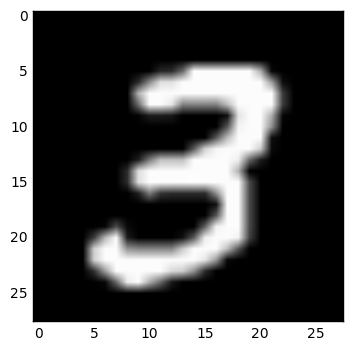

In [3]:
        #lets import and plot one image to see it it's working
    
import matplotlib.pyplot as plt
plt.imshow(X_train[7], cmap='gray', interpolation= 'bilinear')
print("output of X_train[7] is=", y_train[7])
plt.show()


In [4]:
print("shape of X_train=", X_train.shape)
print("shape of y_train=",y_train.shape)
print("shape of X_test=",X_test.shape)
print("shape of X_test=",y_test.shape)

import numpy as np
unique= np.unique(y_test)
print("unique values of the output are = ", unique)

shape of X_train= (60000, 28, 28)
shape of y_train= (60000,)
shape of X_test= (10000, 28, 28)
shape of X_test= (10000,)
unique values of the output are =  [0 1 2 3 4 5 6 7 8 9]


This shows the output consists of numbers from 0 to 9. Before building the keras model, it is better to reduce dimension and then normalize the data to get faster results and it is a recommended approach. Since Red, Green, Blue are 8 bit each, so the range for each individual colour is 0-255 (as 2^8 = 256) This is why the values have to be divided by 255 to get the range between 0 and 1, i.e. normalized. 
Check this out for details: 
https://stackoverflow.com/questions/20486700/why-we-always-divide-rgb-values-by-255



In [5]:
                       # 28*28 = 784
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
print("new shape of X_train=",X_train.shape)
print("new shape of X_test=",X_test.shape)

X_train = X_train/255
X_test =  X_test/255

#Since there are 10 categories of values of y as seen before, we can change the shape of y_train and y_test
# to categorical values of either 0 or 1. This can then be called a "Classification" problem.
#machines love working with Binary values rather than string!
#So each input vector will have 10 values since there are 10 categories (0-9)
# The vector is 0 for all except in the position for the respective category. 

y_train_final = keras.utils.to_categorical(y_train, 10 )
y_test_final = keras.utils.to_categorical(y_test, 10 )

print("for value of 5, the new y_train value becomes:", y_train_final[0], " ---so all positions are 0 expect position 5")
print("for value of 5, the new y_test value becomes:", y_train_final[0], " ---so all positions are 0 expect position 5")

new shape of X_train= (60000, 784)
new shape of X_test= (10000, 784)
for value of 5, the new y_train value becomes: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]  ---so all positions are 0 expect position 5
for value of 5, the new y_test value becomes: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]  ---so all positions are 0 expect position 5


With the data being processed and ready, I can now build my deep learning model using keras.

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()
            # creating input layer of type Dense having 512 nodes
model.add(Dense(512, input_shape=(28*28, ), activation= 'relu', name= "input_layer"))
           # Dropping 25% nodes to reduce overfitting. This is a good recommended approach to overcome overfitting
model.add(Dropout(0.25))

            # creating a hidden layer of type Dense having 128 nodes and then again dropping 25% data
model.add(Dense(512, activation= 'relu', name= "1st_hidden_layer"))
model.add(Dropout(0.25))
         #creating output layer. Since there are 10 categories (0-9), I will use 10 nodes
         # since this is the output, I am using softmax activation for better classification 
model.add(Dense(10, activation= 'softmax', name= "output_layer"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
1st_hidden_layer (Dense)     (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
_________________________________________________________________


In [9]:
#compiling the model using adam optimizer
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])


In [10]:
## using earlystopping callback so that execution stops if accuracy value does not improve within 5 run
from keras.callbacks import EarlyStopping
early_monitor = EarlyStopping(patience=4)

#training and testing the model (80% training, 20% testing)

training= model.fit(X_train, y_train_final, epochs=15, validation_data=( X_test, y_test_final), callbacks=[early_monitor])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 43s - loss: 0.2230 - acc: 0.9322 - val_loss: 0.0954 - val_acc: 0.9713
Epoch 2/15
60000/60000 [==============================] - 48s - loss: 0.1115 - acc: 0.9659 - val_loss: 0.0828 - val_acc: 0.9736
Epoch 3/15
60000/60000 [==============================] - 48s - loss: 0.0886 - acc: 0.9725 - val_loss: 0.0775 - val_acc: 0.9772
Epoch 4/15
60000/60000 [==============================] - 47s - loss: 0.0748 - acc: 0.9769 - val_loss: 0.0813 - val_acc: 0.9762
Epoch 5/15
60000/60000 [==============================] - 47s - loss: 0.0629 - acc: 0.9805 - val_loss: 0.0803 - val_acc: 0.9763
Epoch 6/15
60000/60000 [==============================] - 47s - loss: 0.0586 - acc: 0.9820 - val_loss: 0.0684 - val_acc: 0.9797
Epoch 7/15
60000/60000 [==============================] - 47s - loss: 0.0525 - acc: 0.9838 - val_loss: 0.0699 - val_acc: 0.9820
Epoch 8/15
60000/60000 [==============================

Since there was no further decrease after 5 runs of the val_loss: 0.0684, the execution stopped. The model showed accuracy>98% on UNSEEN data which is pretty incredible. This shows the power of deep neural networks. I only used 3 layers and 1034 nodes. 

 9856/10000 [============================>.] - ETA: 0sTest loss: 0.07118274870846035
Test accuracy: 98.29 %


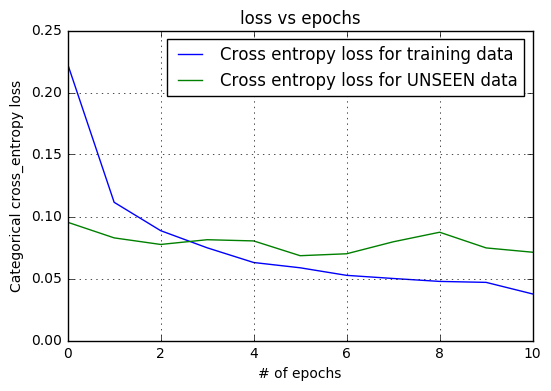

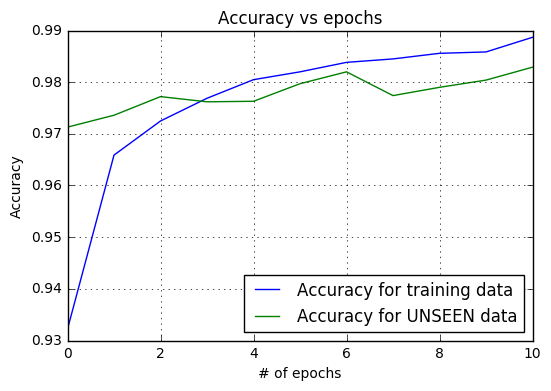

In [31]:
                                #calculating accuracy and loss
    
score = model.evaluate(X_test, y_test_final)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,"%")
    
                                #lets visualize the data
import matplotlib.pyplot as plt

plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.legend(['Cross entropy loss for training data', 'Cross entropy loss for UNSEEN data'])
plt.xlabel("# of epochs")
plt.ylabel("Categorical cross_entropy loss")
plt.title("loss vs epochs")
plt.grid()
plt.show()

plt.plot(training.history["acc"])
plt.plot(training.history["val_acc"])
plt.legend(['Accuracy for training data', 'Accuracy for UNSEEN data'], loc= 'lower right')
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epochs")
plt.grid()
plt.show()




my model showed an accuracy of 98.29% on UNSEEN data which is good. I can see that my model learns the data quite fast and its prediction improves with each epochs. Although I see some overfitting, I think this is acceptable. However, this can be further examined by changing Dropout value and/or changing number of layers and number of nodes. 

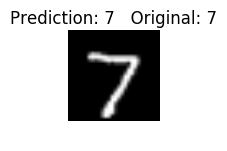

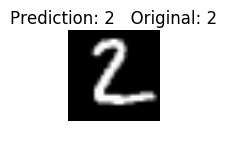

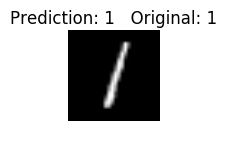

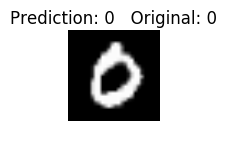

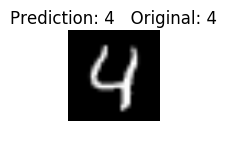

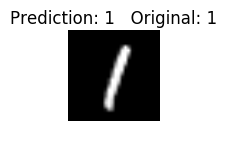

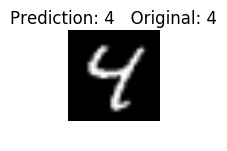

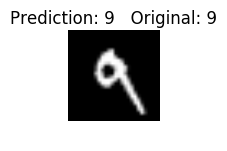

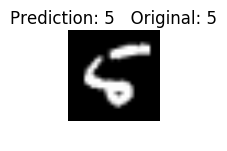

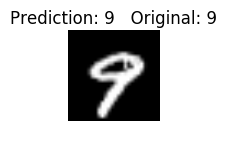

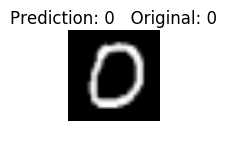

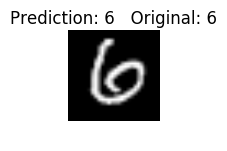

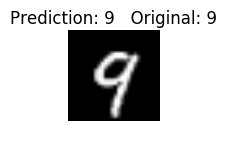

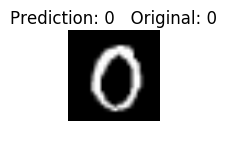

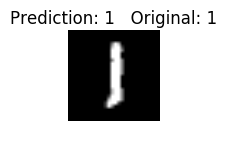

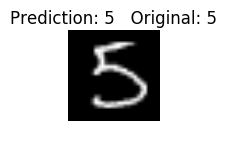

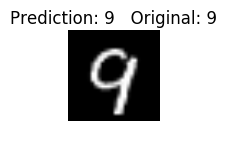

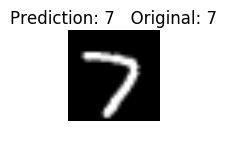

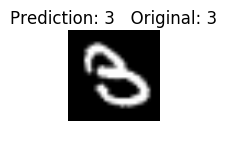

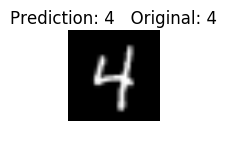

In [88]:
## Now this is the best part! Lets see the result.

for z in range(20):
    check_image = X_test[z,:].reshape(1,784)
    prediction = model.predict(check_image).argmax()
    label = y_test_final[z].argmax()
    if (prediction == label):
        plt.subplot(3,1,1)
        plt.title('Prediction: %d   Original: %d' % (prediction, label))
        plt.imshow(check_image.reshape([28,28]), cmap='gray', interpolation= 'bilinear')
        plt.axis('off')
        plt.show()


This is pretty cool. Now lets see some image that the model failed to recognize





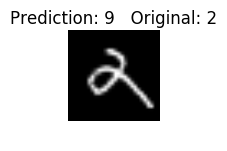

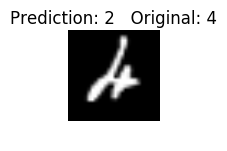

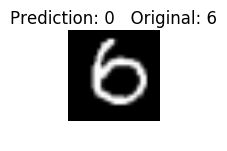

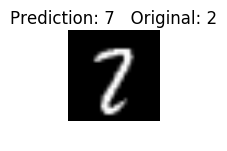

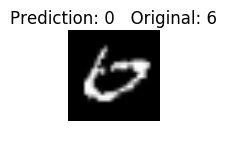

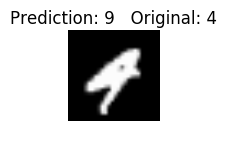

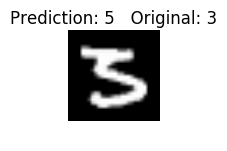

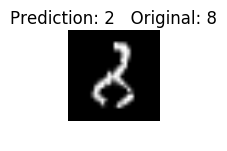

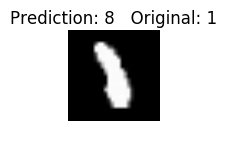

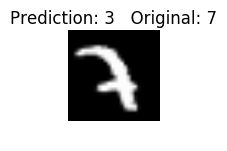

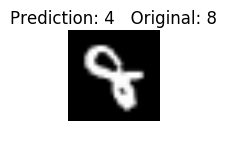

In [89]:

for z in range(700):
    check_image = X_test[z,:].reshape(1,784)
    prediction = model.predict(check_image).argmax()
    label = y_test_final[z].argmax()
    if (prediction != label):
        plt.subplot(3,1,1)
        plt.title('Prediction: %d   Original: %d' % (prediction, label))
        plt.imshow(check_image.reshape([28,28]), cmap='gray', interpolation= 'bilinear')
        plt.axis('off')
        plt.show()


It looks like some numbers that the model could not capture was really not straightforward. For instance, see the number 2 that the model predicted 7- it almost looks like 7. This whole model can be further investigated using Deep Convolutional Neural Network but this is beyond the scope of my laptop as CNN requires very high system requirements!